In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from textvec import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold #Import KFold


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.utils import to_categorical

# Load the dataset from a CSV file
df = pd.read_csv('D:\kuliah\THE ONLY TA THINGS\DATA\data clean\cleaned_data_5000.csv')
df.head()

,content,score,at,label,cleansing,case_folding,no_unwanted,tokenize,normalization,stopwords,stemming,clean
0,Tanpa keterangan,4,2023-04-07 18:17:53,1,Tanpa keterangan,tanpa keterangan,tanpa keterangan,"['tanpa', 'keterangan']","['tanpa', 'keterangan']",['keterangan'],['terang'],terang
1,Sangat menghibur,5,2023-04-09 22:23:31,1,Sangat menghibur,sangat menghibur,sangat menghibur,"['sangat', 'menghibur']","['sangat', 'menghibur']",['menghibur'],['hibur'],hibur
2,Tidak dapat di instal,1,2023-04-12 21:45:11,-1,Tidak dapat di instal,tidak dapat di instal,tidak dapat di instal,"['tidak', 'dapat', 'di', 'instal']","['tidak', 'dapat', 'di', 'install']",['install'],['install'],install
3,Bagus banget siapapun yg buat ini bagus bgt🤩🤩🤩🤩🤩,5,2023-04-13 16:11:48,1,Bagus banget siapapun yg buat ini bagus bgt,bagus banget siapapun yg buat ini bagus bgt,bagus banget siapapun yg buat ini bagus bgt,"['bagus', 'banget', 'siapapun', 'yg', 'buat', ...","['bagus', 'banget', 'siapapun', 'yang', 'buat'...","['bagus', 'banget', 'bagus', 'banget']","['bagus', 'banget', 'bagus', 'banget']",bagus banget bagus banget
4,Aplikasinya sangat bagus,5,2023-04-08 21:57:58,1,Aplikasinya sangat bagus,aplikasinya sangat bagus,aplikasinya sangat bagus,"['aplikasinya', 'sangat', 'bagus']","['aplikasinya', 'sangat', 'bagus']","['aplikasinya', 'bagus']","['aplikasi', 'bagus']",aplikasi bagus


In [2]:
# constants
TF_RF_MAX_FEATURES = 1000
EPOCH_VAL = 10
NUM_CLASSES = 3
BATCH_SIZE = 32

In [3]:
# Split the data into features and labels
# df['tweet_clean'] = df['tweet_clean'].astype(str)
reviews = df['clean'].astype(str).values

raw_label = df['label']
# labels = pd.get_dummies(raw_label).astype(int).values
labels = to_categorical(raw_label, num_classes=NUM_CLASSES)

In [4]:
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [5]:
# tf_rf_vectorizer = vectorizers.TfrfVectorizer()
# tf_rf_review_train = tf_rf_vectorizer.fit_transform(review_train, label_train).toarray()
# tf_rf_review_test = tf_rf_vectorizer.transform(review_test, label_test).toarray()
# max_length = tf_rf_review_train.shape[1]

In [6]:
vectorizer = CountVectorizer(strip_accents='unicode',token_pattern=r'\w{1,}',ngram_range=(1, 1)).fit(df['stemming'])
tfrf_vec = vectorizers.TfrfVectorizer(sublinear_tf=True)
tfrf_vec.fit(vectorizer.transform(df['stemming']), df['label'])
TFRF = tfrf_vec.transform(vectorizer.transform(df['stemming']))
TFRF = TFRF.toarray()

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
review_train, review_test, label_train, label_test = train_test_split(TFRF, labels, test_size=0.3, random_state=42)

In [8]:
review_train.shape

(3500, 2276)

In [9]:
# # Tokenize and vectorize the tweets using TF-RF
# tf_rf_vectorizer = CountVectorizer(max_features=TF_RF_MAX_FEATURES)
# tf_rf_review_train = tf_rf_vectorizer.fit_transform(review_train).toarray()
# tf_rf_review_test = tf_rf_vectorizer.transform(review_test).toarray()

max_length = review_train.shape[1]

# Add an additional dimension for the max_length dimension
tf_rf_review_train = review_train.reshape(review_train.shape[0], 1, review_train.shape[1])
tf_rf_review_test = review_test.reshape(review_test.shape[0], 1, review_test.shape[1])


In [10]:
tf_rf_review_train

array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.]]])

In [11]:
print("x_train: ", tf_rf_review_train.shape)
print("x_test: ", tf_rf_review_test.shape)
print("y_train: ", label_train.shape)
print("y_test: ", label_test.shape)
print("max_length: ", max_length)

x_train:  (3500, 1, 2276)
x_test:  (1500, 1, 2276)
y_train:  (3500, 3)
y_test:  (1500, 3)
max_length:  2276


In [12]:
def rnn_model():
    model = Sequential()
    # # add bidirectional LSTM layer
    # model.add(Bidirectional(LSTM(units=64, return_sequences=True), input_shape=(max_length,)))
    model.add(SimpleRNN(units=64, input_shape=(1, max_length)))
    # add dropout layer to reduce overfitting
    model.add(Dropout(0.2))
    # add dense layer with softmax activation for multi-class classification
    model.add(Dense(units=3, activation='softmax'))
    # compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [13]:
model = rnn_model()
model_fit_result = model.fit(tf_rf_review_train, label_train, batch_size=BATCH_SIZE, epochs=EPOCH_VAL, validation_data=(tf_rf_review_test, label_test))


Epoch 1/10
110/110 [==============================] - 3s 9ms/step - loss: 0.7191 - accuracy: 0.7911 - val_loss: 0.5363 - val_accuracy: 0.8040
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.5004 - accuracy: 0.8120 - val_loss: 0.4727 - val_accuracy: 0.8240
Epoch 3/10
110/110 [==============================] - 1s 10ms/step - loss: 0.4310 - accuracy: 0.8546 - val_loss: 0.4385 - val_accuracy: 0.8460
Epoch 4/10
110/110 [==============================] - 1s 11ms/step - loss: 0.3811 - accuracy: 0.8760 - val_loss: 0.4209 - val_accuracy: 0.8520
Epoch 5/10
110/110 [==============================] - 1s 7ms/step - loss: 0.3431 - accuracy: 0.8897 - val_loss: 0.4106 - val_accuracy: 0.8587
Epoch 6/10
110/110 [==============================] - 1s 7ms/step - loss: 0.3138 - accuracy: 0.9029 - val_loss: 0.4074 - val_accuracy: 0.8700
Epoch 7/10
110/110 [==============================] - 1s 6ms/step - loss: 0.2906 - accuracy: 0.9174 - val_loss: 0.4041 - val_accuracy: 0.8727
Epoc

In [14]:
# Predict the labels for the testing data
label_pred_prob = model.predict(tf_rf_review_test)
label_pred = label_pred_prob.argmax(axis=1)-1
label_test_one_dim = np.argmax(label_test, axis=1)-1

47/47 [==============================] - 0s 4ms/step


In [15]:
print("RNN-TFRF \n")

# print(accuracy_score(label_test_one_dim, label_pred))
print(confusion_matrix(label_test_one_dim, label_pred))
print(classification_report(label_test_one_dim, label_pred))
print("Precision: ",precision_score(label_test_one_dim, label_pred, average="macro"))
print("Recall: ",recall_score(label_test_one_dim, label_pred, average="macro"))
print("F1: ",f1_score(label_test_one_dim, label_pred,  average="macro"))
print("Accuracy: ",accuracy_score(label_test_one_dim, label_pred))

RNN-TFRF 

[[  16   40   10]
 [   4 1167   35]
 [   1   96  131]]
              precision    recall  f1-score   support

          -1       0.76      0.24      0.37        66
           0       0.90      0.97      0.93      1206
           1       0.74      0.57      0.65       228

    accuracy                           0.88      1500
   macro avg       0.80      0.59      0.65      1500
weighted avg       0.87      0.88      0.86      1500

Precision:  0.8006161411284204
Recall:  0.594882445825101
F1:  0.6488606798311255
Accuracy:  0.876


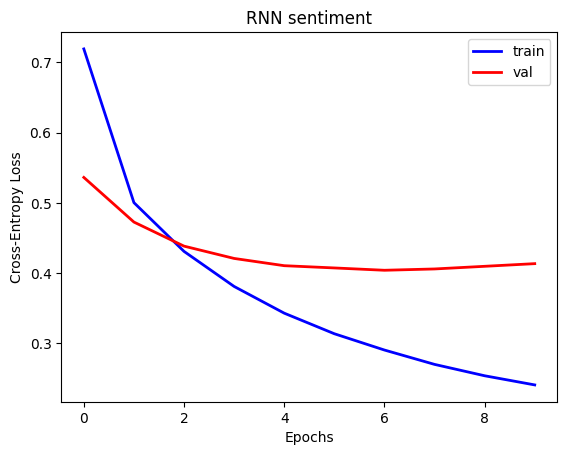

In [16]:
plt.figure()
plt.plot(model_fit_result.history['loss'], lw=2.0, color='b', label='train')
plt.plot(model_fit_result.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc ='upper right')
plt.show()

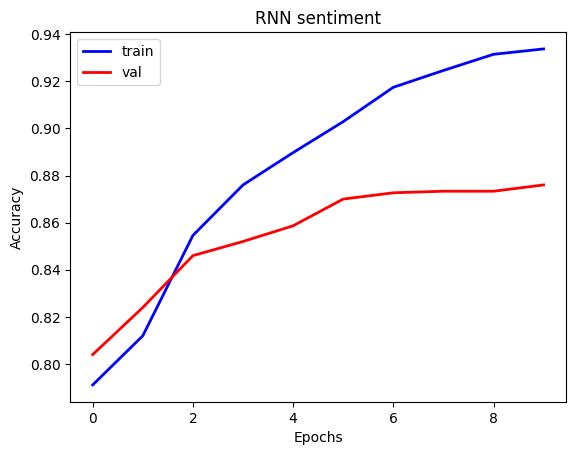

In [17]:
plt.figure()
plt.plot(model_fit_result.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(model_fit_result.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                149824    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 150,019
Trainable params: 150,019
Non-trainable params: 0
_________________________________________________________________


## implement with k-fold cross validation

In [19]:
# define the range of K values to test
k_values = range(2, 12)

# create an array to store the maximum accuracy achieved for each K value
max_acc = np.zeros(len(k_values))

fold = 1
# loop over the K values
for i, k in enumerate(k_values):
    # create the KFold object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # perform cross-validation
    acc_list = []
    for train_idx, test_idx in kf.split(tf_rf_review_train, label_train):
        X_train, X_test = tf_rf_review_train[train_idx], tf_rf_review_train[test_idx]
        y_train, y_test = label_train[train_idx], label_train[test_idx]
        
        # define and fit the model
        model = rnn_model()
        model_fit_kfold = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCH_VAL, validation_data=(X_test, y_test))
        
        # evaluate the model on the test set and store the accuracy
        acc = model.evaluate(X_test, y_test)[1]
        acc_list.append(acc)
        
    # calculate the maximum accuracy achieved for this K value
    max_acc[i] = np.max(acc_list)
    print(f"Fold {fold}: Accuracy = {acc}")
    print('\n')
    fold += 1

    
# find the K value with the highest maximum accuracy
best_k = k_values[np.argmax(max_acc)]

print(f"Best K value: {best_k}")

Epoch 1/10
55/55 [==============================] - 2s 9ms/step - loss: 0.8492 - accuracy: 0.7897 - val_loss: 0.6479 - val_accuracy: 0.8029
Epoch 2/10
55/55 [==============================] - 0s 5ms/step - loss: 0.5558 - accuracy: 0.8034 - val_loss: 0.5611 - val_accuracy: 0.8029
Epoch 3/10
55/55 [==============================] - 0s 5ms/step - loss: 0.4855 - accuracy: 0.8057 - val_loss: 0.5336 - val_accuracy: 0.8080
Epoch 4/10
55/55 [==============================] - 0s 5ms/step - loss: 0.4338 - accuracy: 0.8326 - val_loss: 0.5134 - val_accuracy: 0.8251
Epoch 5/10
55/55 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8697 - val_loss: 0.5008 - val_accuracy: 0.8406
Epoch 6/10
55/55 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.8914 - val_loss: 0.4907 - val_accuracy: 0.8423
Epoch 7/10
55/55 [==============================] - 0s 5ms/step - loss: 0.3210 - accuracy: 0.9051 - val_loss: 0.4846 - val_accuracy: 0.8400
Epoch 8/10
55/55 [==

In [20]:
print("Max accuration Word2Vec-TFRF in 10 times k-fold cross validation: \n")

for i, val in enumerate(acc_list, start=2):
    print("Fold {}: {}".format(i, val))

print('\n')
print("max accuracy: ", np.max(acc_list)*100)
print("avg accuracy: ", np.mean(acc_list)*100)

best_k = k_values[np.argmax(max_acc)]
print(f"Best K value: {best_k}")

Max accuration Word2Vec-TFRF in 10 times k-fold cross validation: 

Fold 2: 0.8620689511299133
Fold 3: 0.852664589881897
Fold 4: 0.8647798895835876
Fold 5: 0.8333333134651184
Fold 6: 0.8679245114326477
Fold 7: 0.8773584961891174
Fold 8: 0.8836477994918823
Fold 9: 0.8993710875511169
Fold 10: 0.8867924809455872
Fold 11: 0.9088050127029419
Fold 12: 0.8773584961891174


max accuracy:  90.88050127029419
avg accuracy:  87.40095116875388
Best K value: 11


_`K-fold cross validation with choosen K value (best accuracy)`_

In [21]:
# split data into K folds

Best_K_value = 9
arr_score = []

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)

kf = KFold(n_splits=Best_K_value, random_state=0, shuffle = True)
for fold, (train_idx, val_idx) in enumerate(kf.split(tf_rf_review_train, label_train)):
    
    # Split train data into train and validation sets
    x_train_fold = tf_rf_review_train[train_idx]
    y_train_fold = label_train[train_idx]
    x_val_fold = tf_rf_review_train[val_idx]
    y_val_fold = label_train[val_idx]

    # build and compile the model
    model = rnn_model()

    # train the model
    result_fit_kfold = model.fit(tf_rf_review_train, label_train, batch_size=BATCH_SIZE, epochs=EPOCH_VAL, validation_data=(tf_rf_review_test, label_test))

    # evaluate the model on test set
    score = model.evaluate(tf_rf_review_test, label_test, batch_size=BATCH_SIZE, verbose=1)
    arr_score.append(score[1]*100)
    print("Fold %d: %s: %.2f%%" % (fold+1, model.metrics_names[1], score[1]*100)) 

    # Predict the labels for the testing data
    label_pred_prob = model.predict(tf_rf_review_test)
    label_pred = label_pred_prob.argmax(axis=1)-1
    label_test_one_dim = np.argmax(label_test, axis=1)-1

    actual_classes = np.append(actual_classes, label_test_one_dim)
    predicted_classes = np.append(predicted_classes, label_pred)

Epoch 1/10
110/110 [==============================] - 2s 6ms/step - loss: 0.7098 - accuracy: 0.7940 - val_loss: 0.5340 - val_accuracy: 0.8040
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.8146 - val_loss: 0.4706 - val_accuracy: 0.8267
Epoch 3/10
110/110 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8560 - val_loss: 0.4368 - val_accuracy: 0.8447
Epoch 4/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3778 - accuracy: 0.8809 - val_loss: 0.4205 - val_accuracy: 0.8533
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3407 - accuracy: 0.8900 - val_loss: 0.4107 - val_accuracy: 0.8653
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 0.3103 - accuracy: 0.9063 - val_loss: 0.4072 - val_accuracy: 0.8707
Epoch 7/10
110/110 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.9154 - val_loss: 0.4063 - val_accuracy: 0.8720
Epoch 

In [22]:
print("RNN-TFRF w/ kfold (Best_K_value = %2d): \n" %(Best_K_value))


# print(accuracy_score(label_test_one_dim, label_pred))
print(confusion_matrix(label_test_one_dim, label_pred))
print(classification_report(label_test_one_dim, label_pred))
print("Precision: ",precision_score(label_test_one_dim, label_pred, average="macro"))
print("Recall: ",recall_score(label_test_one_dim, label_pred, average="macro"))
print("F1: ",f1_score(label_test_one_dim, label_pred,  average="macro"))
print("Accuracy: ",accuracy_score(label_test_one_dim, label_pred))

RNN-TFRF w/ kfold (Best_K_value =  9): 

[[  16   40   10]
 [   4 1162   40]
 [   1   93  134]]
              precision    recall  f1-score   support

          -1       0.76      0.24      0.37        66
           0       0.90      0.96      0.93      1206
           1       0.73      0.59      0.65       228

    accuracy                           0.87      1500
   macro avg       0.80      0.60      0.65      1500
weighted avg       0.87      0.87      0.86      1500

Precision:  0.7958209762557589
Recall:  0.5978864317434625
F1:  0.6491766125079188
Accuracy:  0.8746666666666667


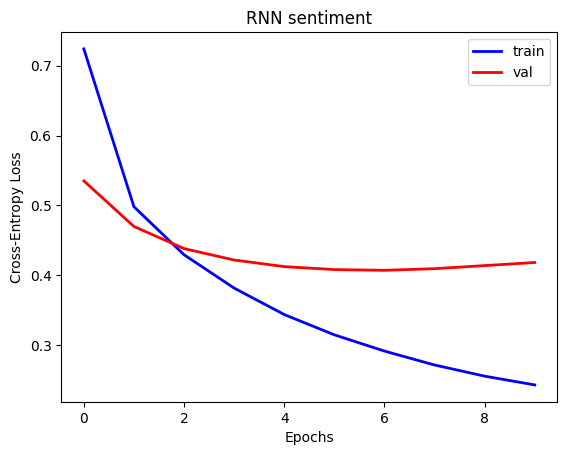

In [23]:
plt.figure()
plt.plot(result_fit_kfold.history['loss'], lw=2.0, color='b', label='train')
plt.plot(result_fit_kfold.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc ='upper right')
plt.show()

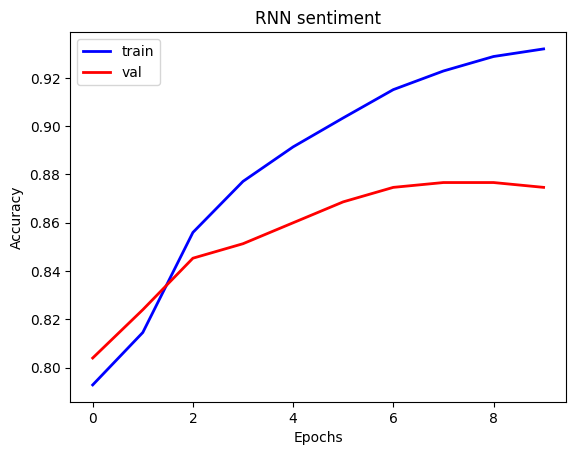

In [24]:
plt.figure()
plt.plot(result_fit_kfold.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(result_fit_kfold.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('RNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [25]:
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_74 (SimpleRNN)   (None, 64)                149824    
                                                                 
 dropout_74 (Dropout)        (None, 64)                0         
                                                                 
 dense_74 (Dense)            (None, 3)                 195       
                                                                 
Total params: 150,019
Trainable params: 150,019
Non-trainable params: 0
_________________________________________________________________
